<a href="https://colab.research.google.com/github/Twilight1029/Python-for-Data-Analysis/blob/main/CH11_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 11 Time Series

Time Series data is an important form of structured data in many different fields. Many time series are fixed frequency.

Time series can also be irregular withoud a fixed unit of time or offset between units.

## 11.1 Data and Time Data Types and Tools

datetime, time, calendar modules

In [ ]:
from datetime import datetime
now = datetime.now()

now

datetime.datetime(2021, 1, 15, 7, 43, 29, 873307)

In [ ]:
now.year, now.month, now.day

(2021, 1, 15)

In [ ]:
# datetime stores both the date and time down to the microsecond
# timedelta represents the temporal difference between two datetime objects
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(926, 56700)

In [ ]:
delta.days

926

In [ ]:
delta.seconds

56700

We can add or subtract a timedelta or multiple thereof to a datetime object to yield a new shifted object

In [ ]:
from datetime import timedelta

start = datetime(2011, 1, 7)

In [ ]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [ ]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

**The data types in the datetime module.**

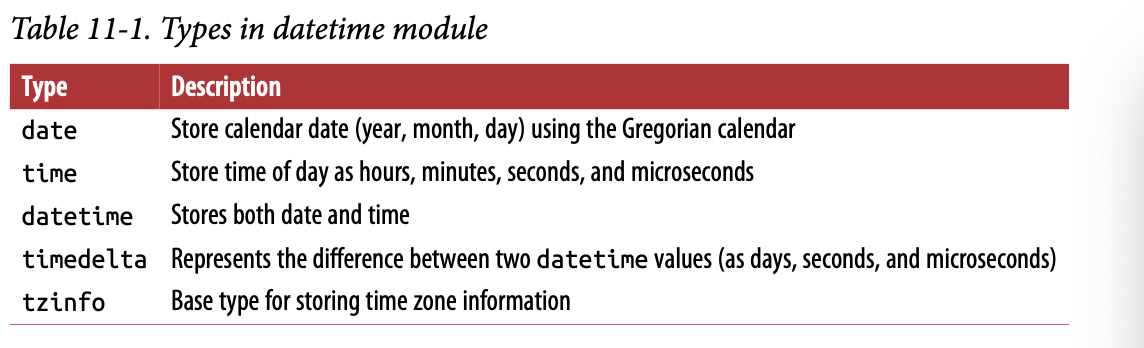

### Converting between string and datetime

In [ ]:
# use str or strftime to pass a format of datetime
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [ ]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

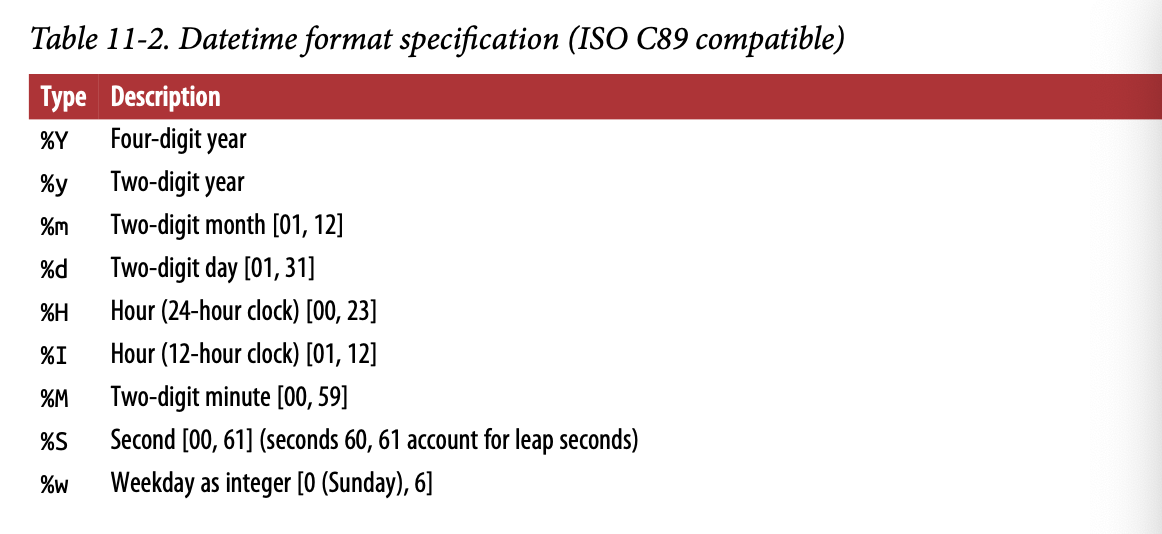

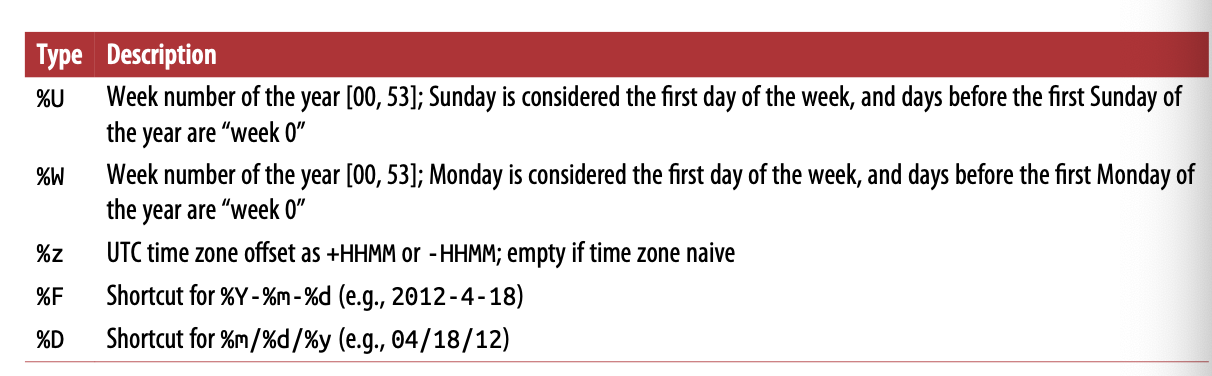

**REMEMBER:**

%F: shortcut for %Y-%m-%d(eg.2012-04-18)

%D: shortcut for %m/%d/%y(eg.04-18-12)

In [ ]:
# convert the strings to dates using datetime.strptime
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

**datetime.strptime** is a good way to parse a date with a known format.
if you don't know the format, you can use the parser.parse method in the third-party **dateutil** package

In [ ]:
from dateutil.parser import parse

In [ ]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
# dateutil is capable of parsing most human-intelligible data representations
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [ ]:
# pass the dayfirst = True to indicate the day appearing before month
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

In [ ]:
parse('11/12/11')

datetime.datetime(2011, 11, 12, 0, 0)

In pandas, to_datetime method parses many different kinds of date representations

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datestr = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [ ]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
# it also handles values that should be considered missing
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

NaT is pandas's null value for timestamp data

## 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [ ]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 19), datetime(2011, 2, 19)]

In [ ]:
ts = pd.Series(np.random.randn(6), index = dates)

In [ ]:
ts

2011-01-02   -0.189960
2011-01-05    0.376658
2011-01-07    0.502153
2011-01-08    0.069265
2011-01-19    0.591782
2011-02-19   -0.760090
dtype: float64

In [ ]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-19', '2011-02-19'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# like other series, arithmetic opereations between 
# differently indexed time series automatically align on the dates
ts + ts[::2]

2011-01-02   -0.379920
2011-01-05         NaN
2011-01-07    1.004306
2011-01-08         NaN
2011-01-19    1.183565
2011-02-19         NaN
dtype: float64

In [ ]:
ts[::2]

2011-01-02   -0.189960
2011-01-07    0.502153
2011-01-19    0.591782
dtype: float64

pandas stores timestamps using Numpy's datetime64 data type at the nanosecond resolution

In [ ]:
ts.index.dtype

dtype('<M8[ns]')

scalar values from a DatetimeIndex are pandas Timestamp objects

In [ ]:
stamp = ts.index[0]

In [ ]:
stamp

Timestamp('2011-01-02 00:00:00')

A timestamp can be stubstitued anywhere you would use a datetime object. Additionally, it can store frequency information and understands how to do time zone conversions and other kinds of manipulations.

### Indexing, Selection, Subsetting

Time series behaves like any other pandas, Series when you are indexing and selecting data based on label.

In [ ]:
stamp = ts.index[2]

In [ ]:
ts[stamp]

0.5021529559858091

In [ ]:
# pass a string that is interpretable as a date
ts['1/07/2011']

0.5021529559858091

In [ ]:
ts['20110107']

0.5021529559858091

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [ ]:
longer_ts = pd.Series(np.random.randn(1000),
                      index = pd.date_range('1/1/2000', periods = 1000))

In [ ]:
longer_ts

2000-01-01   -1.147173
2000-01-02   -1.610255
2000-01-03    0.204825
2000-01-04    0.058568
2000-01-05   -1.268930
                ...   
2002-09-22    1.152495
2002-09-23   -0.853846
2002-09-24    0.721650
2002-09-25   -1.020957
2002-09-26    0.423816
Freq: D, Length: 1000, dtype: float64

In [ ]:
longer_ts['2001']

2001-01-01   -0.367789
2001-01-02   -0.516869
2001-01-03   -2.131525
2001-01-04   -0.356901
2001-01-05   -0.213153
                ...   
2001-12-27    0.106830
2001-12-28    0.158521
2001-12-29   -0.297406
2001-12-30    0.252272
2001-12-31   -0.277370
Freq: D, Length: 365, dtype: float64

In [ ]:
longer_ts['2001-05']

2001-05-01   -0.390764
2001-05-02   -1.005957
2001-05-03    0.024312
2001-05-04    0.718684
2001-05-05   -0.247366
2001-05-06    1.241960
2001-05-07    0.950159
2001-05-08   -0.368486
2001-05-09   -0.315354
2001-05-10    0.982472
2001-05-11   -0.862133
2001-05-12    2.369477
2001-05-13   -0.126468
2001-05-14   -0.624573
2001-05-15   -1.239180
2001-05-16    0.983087
2001-05-17    1.000184
2001-05-18    1.771232
2001-05-19    0.011525
2001-05-20    0.455968
2001-05-21   -0.168326
2001-05-22   -0.285124
2001-05-23   -0.350888
2001-05-24    0.447122
2001-05-25   -0.259568
2001-05-26    0.287054
2001-05-27    0.433403
2001-05-28    1.537355
2001-05-29   -0.466178
2001-05-30   -0.450202
2001-05-31   -1.010486
Freq: D, dtype: float64

In [ ]:
# slicing with datetime objects
ts[datetime(2011, 1, 7)]

0.5021529559858091

In [ ]:
# most time series data is ordered chronologically
# you can slice with time-stamps not contained in a time series
# to perform a range query:
ts

2011-01-02   -0.189960
2011-01-05    0.376658
2011-01-07    0.502153
2011-01-08    0.069265
2011-01-19    0.591782
2011-02-19   -0.760090
dtype: float64

In [ ]:
ts['1/6/2011':'1/20/2011']

2011-01-07    0.502153
2011-01-08    0.069265
2011-01-19    0.591782
dtype: float64

Use **truncate** to slice a Series between two dates

In [ ]:
ts.truncate(after = '1/9/2011')

2011-01-02   -0.189960
2011-01-05    0.376658
2011-01-07    0.502153
2011-01-08    0.069265
dtype: float64

We can also slice the datetime in DataFrames

In [ ]:
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')

In [ ]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = dates,
                       columns = ['Colorado', 'Texas',
                                  'New York', 'Ohio'])

In [ ]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-1.035959,-0.633979,-0.656418,-1.402906
2000-01-12,0.111428,-0.189570,0.943426,0.220082
2000-01-19,-0.750314,-0.723020,-1.131952,-1.414275
2000-01-26,1.698429,1.686076,-1.411539,-0.427186
2000-02-02,0.412918,1.509210,1.027169,0.375851
...,...,...,...,...
2001-10-31,-0.277118,0.569208,-0.725554,2.119000
2001-11-07,-0.988642,-0.012221,0.357577,-0.305678
2001-11-14,-1.215654,1.370429,-1.641321,-1.309188
2001-11-21,2.767127,0.828342,-1.060126,-0.136712


In [ ]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.771801,-0.892736,0.926687,-0.702164
2001-05-09,0.157287,0.405050,-0.591144,0.239425
2001-05-16,-0.409210,0.294923,0.725971,-1.191443
2001-05-23,-0.299989,-0.145167,-0.251799,-0.030714
2001-05-30,-1.046950,-0.209728,0.782712,-0.274522


### Time Series with Duplicate Indices

How to deal with duplicate data observations

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [ ]:
dup_ts = pd.Series(np.arange(5), index = dates)

In [ ]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its is_unique property

In [ ]:
dup_ts.index.is_unique

False

In [ ]:
# indexing wil produce scalar values or slices depend on
# whether the timestamp is duplicated or not
dup_ts['1/3/2000']

4

In [ ]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

if you want to aggregate the data with duplicate timestamps. Use groupby and pass level = 0

In [ ]:
grouped = dup_ts.groupby(level = 0)

In [ ]:
grouped = dup_ts.groupby(by=dup_ts.index) # this works the same as before

In [ ]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [ ]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date ranges, Frequencies, and Shifting

We usually assume time series have fixed frequency, it will be easier to process.

In pandas, we have a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges.

In [ ]:
ts.resample()

2012-02-07 09:30:00   -1.460302
2012-02-08 09:30:00   -0.456343
2012-02-09 09:30:00   -0.460796
2012-02-10 09:30:00    0.588431
2012-02-13 09:30:00    1.915248
2012-02-14 09:30:00   -0.154605
2012-02-15 09:30:00    0.587574
2012-02-16 09:30:00    0.031580
2012-02-17 09:30:00    0.537533
2012-02-20 09:30:00   -0.941681
Freq: B, dtype: float64

In [ ]:
# convert the sample time series to be fixed daily frequency 
# by calling resample
resampler = ts.resample('D')  # string 'D' is interpreted as daily frequency

In [ ]:
np.array(resampler)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([[Timestamp('2012-02-07 00:00:00', freq='D'),
        2012-02-07 09:30:00   -1.460302
Freq: B, dtype: float64],
       [Timestamp('2012-02-08 00:00:00', freq='D'),
        2012-02-08 09:30:00   -0.456343
Freq: B, dtype: float64],
       [Timestamp('2012-02-09 00:00:00', freq='D'),
        2012-02-09 09:30:00   -0.460796
Freq: B, dtype: float64],
       [Timestamp('2012-02-10 00:00:00', freq='D'),
        2012-02-10 09:30:00    0.588431
Freq: B, dtype: float64],
       [Timestamp('2012-02-11 00:00:00', freq='D'),
        Series([], Freq: B, dtype: float64)],
       [Timestamp('2012-02-12 00:00:00', freq='D'),
        Series([], Freq: B, dtype: float64)],
       [Timestamp('2012-02-13 00:00:00', freq='D'),
        2012-02-13 09:30:00    1.915248
Freq: B, dtype: float64],
       [Timestamp('2012-02-14 00:00:00', freq='D'),
        2012-02-14 09:30:00   -0.154605
Freq: B, dtype: float64],
       [Timestamp('2012-02-15 00:00:00', freq='D'),
        2012-02-15 09:30:00    0.587574
Freq

In [ ]:
pd.DataFrame(resampler)  # how to show resampler, to take a look at it, use dataframe

,0,1
0,2012-02-07,"2012-02-07 09:30:00 -1.460302 Freq: B, dtype..."
1,2012-02-08,"2012-02-08 09:30:00 -0.456343 Freq: B, dtype..."
2,2012-02-09,"2012-02-09 09:30:00 -0.460796 Freq: B, dtype..."
3,2012-02-10,"2012-02-10 09:30:00 0.588431 Freq: B, dtype..."
4,2012-02-11,"Series([], Freq: B, dtype: float64)"
5,2012-02-12,"Series([], Freq: B, dtype: float64)"
6,2012-02-13,"2012-02-13 09:30:00 1.915248 Freq: B, dtype..."
7,2012-02-14,"2012-02-14 09:30:00 -0.154605 Freq: B, dtype..."
8,2012-02-15,"2012-02-15 09:30:00 0.587574 Freq: B, dtype..."
9,2012-02-16,"2012-02-16 09:30:00 0.03158 Freq: B, dtype:..."


### Generating Data Ranges

pandas.date_range is responsible for generating a DatetimeIndex with an indeicated length according to a particular frequency:

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [ ]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
# by default, date_range generates daily timestamps
# if you pass only a start or end date, 
# you must pass a number of periods to generate
pd.date_range(start = '2012-04-01', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end = '2012-06-01', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

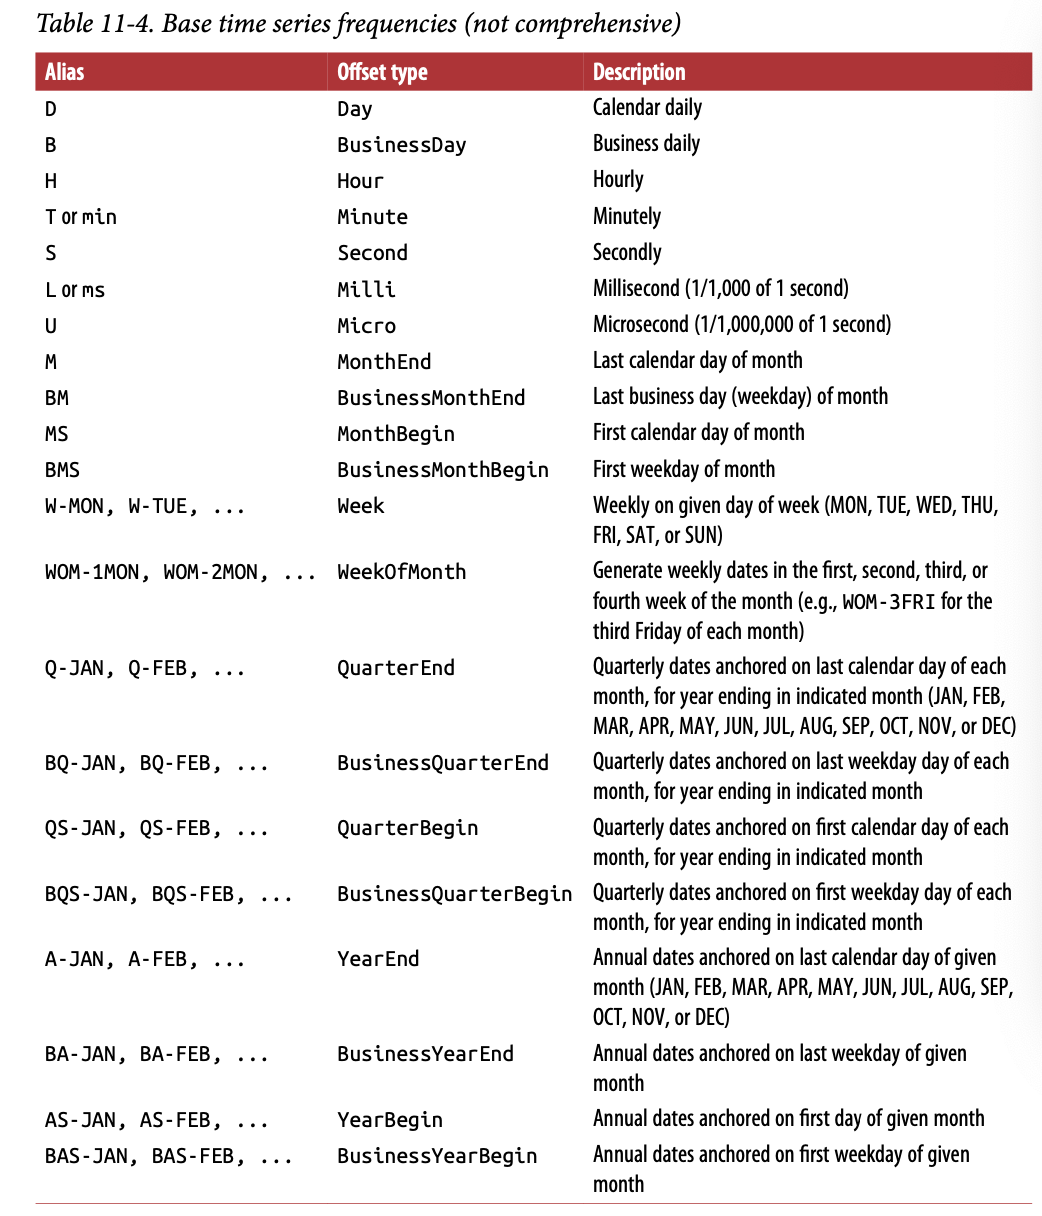

if you want a date index containing the last business day of each month, you would pass the 'BM' frequency( Business end of month, see more complete listing below) and only dates falling on or inside the date interval will be included.

In [ ]:
pd.date_range('2000-01-01', '2000-12-01', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [ ]:
# date_range by default preserve the time(if any) of 
# the start or end timestamp
pd.date_range('2012-05-02 12:56:31', periods = 5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# normolize the timestamps to midnight as a convention
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

Frequencies in pandas are composed of a bse frequency and a multiplier. Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a date offset. 

In [ ]:
from pandas.tseries.offsets import Hour, Minute

In [ ]:
hour = Hour()

In [ ]:
hour

<Hour>

In [ ]:
# define a multiple of an offset by passing an integer:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [ ]:
# putting an integer before the base frequency creates a multiple automatically
pd.date_range('2000-01-01', '2000-01-03 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
# many offsets can be combined together by addition
Hour(2) + Minute(30)

<150 * Minutes>

In [ ]:
# pass frequency strings
pd.date_range('2000-01-01', periods = 10, freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

One useful frequency class is 'week of month', starting with WOM. This enables you to get dates like the third Friday of each month:

In [ ]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq = 'WOM-3FRI')

In [ ]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting( Leading and Lagging) Data

Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [ ]:
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))

In [ ]:
ts

2000-01-31   -0.130603
2000-02-29    0.879691
2000-03-31   -1.564057
2000-04-30   -1.100692
Freq: M, dtype: float64

In [ ]:
# Shift index by desired number of periods with an optional time freq.
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.130603
2000-04-30    0.879691
Freq: M, dtype: float64

In [ ]:
ts.shift(-2)

2000-01-31   -1.564057
2000-02-29   -1.100692
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [ ]:
# computing percentage changes using shift
ts / ts.shift(1) -1

2000-01-31         NaN
2000-02-29   -7.735586
2000-03-31   -2.777962
2000-04-30   -0.296258
Freq: M, dtype: float64

Because naive shifts leave the index unmodified, some data is discarded. Thus **if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data:**

In [ ]:
ts.shift(2, freq = 'M')

2000-03-31   -0.130603
2000-04-30    0.879691
2000-05-31   -1.564057
2000-06-30   -1.100692
Freq: M, dtype: float64

In [ ]:
# other frequencies can be passed too
ts.shift(3, freq = 'D')

2000-02-03   -0.130603
2000-03-03    0.879691
2000-04-03   -1.564057
2000-05-03   -1.100692
dtype: float64

In [ ]:
ts.shift(1, freq = '90T') # T here stands for minutes

2000-01-31 01:30:00   -0.130603
2000-02-29 01:30:00    0.879691
2000-03-31 01:30:00   -1.564057
2000-04-30 01:30:00   -1.100692
dtype: float64

### Shifting dates with offsets

In [ ]:
# use datetime or Timestamp objects for offsets
from pandas.tseries.offsets import Day, MonthEnd

In [ ]:
now = datetime(2011, 11, 18)

In [ ]:
now + 3 * Day()

Timestamp('2011-11-21 00:00:00')

In [ ]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [ ]:
# anchored offsets can 'roll' dates forward or backward by using
# rollforward and rollback methods
offset = MonthEnd()

In [ ]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [ ]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [ ]:
# a creative use of date offsets is to use them with groupby
ts = pd.Series(np.random.randn(20),
               index = pd.date_range('1/15/2000', periods = 20, freq = '4d'))

In [ ]:
ts

2000-01-15   -0.426970
2000-01-19   -0.248559
2000-01-23    1.519054
2000-01-27   -0.097521
2000-01-31    0.385683
2000-02-04    0.681555
2000-02-08    0.029401
2000-02-12   -1.049132
2000-02-16   -1.235199
2000-02-20   -0.471628
2000-02-24   -2.371465
2000-02-28   -0.325175
2000-03-03   -0.887639
2000-03-07    1.397369
2000-03-11    0.106701
2000-03-15    1.392695
2000-03-19   -0.894911
2000-03-23    1.129368
2000-03-27   -1.237284
2000-03-31   -0.485045
Freq: 4D, dtype: float64

In [ ]:
offset.rollforward

<function MonthEnd.rollforward>

In [ ]:
ts.groupby(offset.rollforward).mean() 
# get the mean of every month by combining offset.rollforward
# with groupby method

2000-01-31    0.226337
2000-02-29   -0.677378
2000-03-31    0.065157
dtype: float64

In [ ]:
ts[0:5].mean()

0.22633724520247012

An easier and faster way to do this --> use **resample**

In [ ]:
ts.resample('M').mean()

2000-01-31    0.226337
2000-02-29   -0.677378
2000-03-31    0.065157
Freq: M, dtype: float64

## 11.4 Time Zone Handling

Most time series data works with **coordinated universal time or UTC**, which is the successor to Greenwich Mean Time and is the current international standard.

Use **Olson** database and **pytz** library in python

In [ ]:
import pytz

In [ ]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
# get a time zone object from pytz, use pytz.timezone
tz = pytz.timezone('America/New_York')

In [ ]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

By default, time series in pandas are time zone naive

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [ ]:
ts

2012-03-09 09:30:00    1.200669
2012-03-10 09:30:00    1.816086
2012-03-11 09:30:00    0.542499
2012-03-12 09:30:00    0.317101
2012-03-13 09:30:00   -0.751137
2012-03-14 09:30:00   -0.663203
Freq: D, dtype: float64

In [ ]:
print(ts.index.tz) # the timezone field is None

None


In [ ]:
# date ranges can be generated with a time zone set
pd.date_range('3/9/2012 9:30', periods = 10, freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
# tz_localize to convert naive to localized
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

2012-03-09 09:30:00+00:00    1.200669
2012-03-10 09:30:00+00:00    1.816086
2012-03-11 09:30:00+00:00    0.542499
2012-03-12 09:30:00+00:00    0.317101
2012-03-13 09:30:00+00:00   -0.751137
2012-03-14 09:30:00+00:00   -0.663203
Freq: D, dtype: float64

In [ ]:
ts

2012-03-09 09:30:00    1.200669
2012-03-10 09:30:00    1.816086
2012-03-11 09:30:00    0.542499
2012-03-12 09:30:00    0.317101
2012-03-13 09:30:00   -0.751137
2012-03-14 09:30:00   -0.663203
Freq: D, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts_utc.index.tz

<UTC>

In [ ]:
# convert to different time zones using tz_convert
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.200669
2012-03-10 04:30:00-05:00    1.816086
2012-03-11 05:30:00-04:00    0.542499
2012-03-12 05:30:00-04:00    0.317101
2012-03-13 05:30:00-04:00   -0.751137
2012-03-14 05:30:00-04:00   -0.663203
Freq: D, dtype: float64

In [ ]:
# tz_localize and tz_convert are instance methods on DatetimeIndex
ts.index.tz_localize('Asia/Singapore')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Singapore]', freq=None)

### Operations with Time Zone-Aware Timestamp Objects

Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone–aware and converted from one time zone to another:

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [ ]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.tz_convert('Asia/Singapore')

Timestamp('2011-03-12 12:00:00+0800', tz='Asia/Singapore')

In [ ]:
# pass a time zone when creating the Timestamp
stamp_Moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')

In [ ]:
stamp_Moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone–aware Timestamp objects internally store a UTC timestamp value as nano‐ seconds since the Unix epoch (January 1, 1970); this UTC value is invariant between time zone conversions:

In [ ]:
stamp_utc.value

1299902400000000000

In [ ]:
stamp_utc.tz_convert('Asia/Singapore').value

1299902400000000000

When performing time arithmetic using pandas’s DateOffset objects, pandas respects daylight saving time transitions where possible.

In [ ]:
from pandas.tseries.offsets import Hour

In [ ]:
stamp = pd.Timestamp('2012-03-12 01:30', tz = 'US/Eastern')

In [ ]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [ ]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [ ]:
stamp + 2 * Hour()

Timestamp('2012-03-12 03:30:00-0400', tz='US/Eastern')

### Operations Between Different Time Zones

If two time series with different time zones are combined, the result will be **UTC.**

In [ ]:
rng = pd.date_range('2/7/2012 9:30', periods = 10, freq = 'B')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [ ]:
ts

2012-02-07 09:30:00   -1.460302
2012-02-08 09:30:00   -0.456343
2012-02-09 09:30:00   -0.460796
2012-02-10 09:30:00    0.588431
2012-02-13 09:30:00    1.915248
2012-02-14 09:30:00   -0.154605
2012-02-15 09:30:00    0.587574
2012-02-16 09:30:00    0.031580
2012-02-17 09:30:00    0.537533
2012-02-20 09:30:00   -0.941681
Freq: B, dtype: float64

In [ ]:
ts1 = ts[:7].tz_localize('Europe/London')

In [ ]:
ts2 =  ts1[2:].tz_convert('Asia/Singapore')

In [ ]:
result = ts1 + ts2

In [ ]:
result.index.tz # add together, we get UTC

<UTC>

## 11.5 Periods and Period Arithmetic

Periods represent timespans, like days, months, years. The Period class represents this data type, requring a string or integer and a frequency from 'base time series frequencies- table before'

In [ ]:
p = pd.Period(2007, freq = 'A-DEC')

In [ ]:
# here it represents the full timespan from 
# Jan 1, 2007 to Dec 31, 2007, inclusive
p

Period('2007', 'A-DEC')

In [ ]:
p + 5

Period('2012', 'A-DEC')

In [ ]:
p - 2

Period('2005', 'A-DEC')

In [ ]:
pd.Period('2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

In [ ]:
# reqular ranges of periods can be constructed with 
# the period_range function
rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M')

In [ ]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [ ]:
# PeriodIndex class stores a sequence of periods and can serve
# as an axis index in any pandas data structure
pd.Series(np.random.randn(6), index = rng)

2000-01    0.864925
2000-02   -1.569106
2000-03   -0.292331
2000-04   -0.357299
2000-05    0.366730
2000-06   -0.980410
Freq: M, dtype: float64

In [ ]:
# use the PeriodIndex class with an array of strings
values = ['2001Q3' , '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC')

In [ ]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

Periods and PeriodIndex objects can be converted to another frequency with **asfreq** method. 

In [ ]:
p = pd.Period('2007', freq = 'A-DEC') # year end of Dec

In [ ]:
p

Period('2007', 'A-DEC')

In [ ]:
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [ ]:
p.asfreq('M', how = 'end')

Period('2007-12', 'M')

Think of Period('2007, 'A-DEC') as a cursor pointing to a span of time, subdivided by monthly periods.

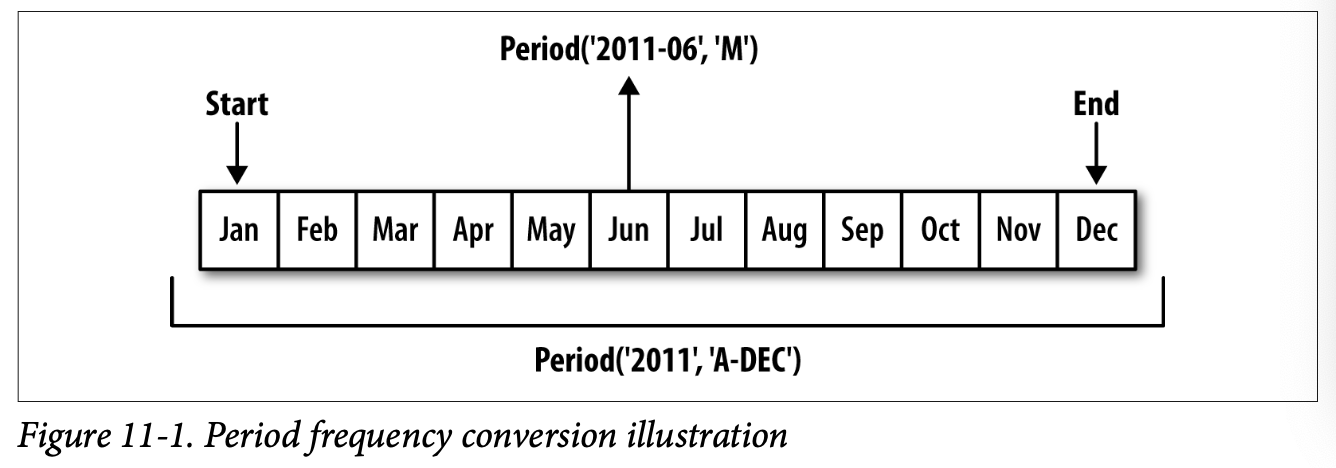

In [ ]:
p = pd.Period('2007', freq = 'A-JUN') # year end of june

In [ ]:
p

Period('2007', 'A-JUN')

In [ ]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [ ]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from high to low frequency, pandas determines the super‐ period depending on where the subperiod “belongs.”

In [ ]:
p = pd.Period('Aug-2007', 'M')

In [ ]:
p.asfreq('A-JUN') # year end of Jun, then Aug becomes 2008

Period('2008', 'A-JUN')

Other PeriodIndex objects can be converted too

In [ ]:
rng = pd.period_range('2006', '2009', freq = 'A-DEC')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [ ]:
ts

2006   -1.652807
2007   -0.010081
2008    0.569241
2009   -1.138592
Freq: A-DEC, dtype: float64

In [ ]:
ts.asfreq('M', how = 'start')

2006-01   -1.652807
2007-01   -0.010081
2008-01    0.569241
2009-01   -1.138592
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how = 'end') # use the last businesss day of each year

2006-12-29   -1.652807
2007-12-31   -0.010081
2008-12-31    0.569241
2009-12-31   -1.138592
Freq: B, dtype: float64

### Quarterly Period Frequencies

Common in finance, accounting fields. Usually reports relative to a fiscal year end.

In [ ]:
p = pd.Period('2012Q4', freq = 'Q-JAN') # year end quarter to JAN

In [ ]:
p

Period('2012Q4', 'Q-JAN')

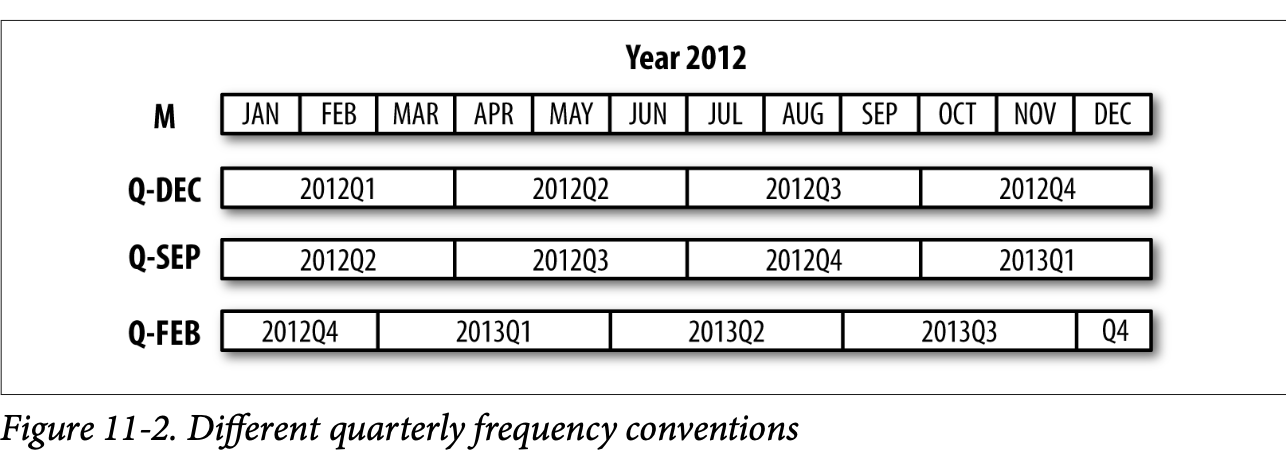

In [ ]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [ ]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [ ]:
# do period arithmetic
# get the timestamp at 4 PM 
# on the second-to-last business day of the quarter,
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [ ]:
p4pm

Period('2012-01-30 16:00', 'T')

In [ ]:
p4pm.to_timestamp

<function Period.to_timestamp>

In [ ]:
# generate quarterly ranges using period_range
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')

In [ ]:
ts = pd.Series(np.arange(len(rng)), index = rng)

In [ ]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [ ]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [ ]:
ts.index = new_rng.to_timestamp()

In [ ]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods with the to_period method

In [ ]:
rng = pd.date_range('2000-01-01', periods = 3, freq = 'M')

In [ ]:
ts = pd.Series(np.random.randn(3), index = rng)

In [ ]:
ts

2000-01-31    0.663844
2000-02-29   -0.346539
2000-03-31    0.803853
Freq: M, dtype: float64

In [ ]:
pts = ts.to_period()

In [ ]:
pts

2000-01    0.663844
2000-02   -0.346539
2000-03    0.803853
Freq: M, dtype: float64

Since periods refer to **non-overlapping timespans**, a timestamp can only belong to a single period for a given frequency. While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want. There is also **no problem with having duplicate periods in the result:**

In [ ]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')

In [ ]:
ts2 = pd.Series(np.random.randn(6), index = rng)

In [ ]:
ts2

2000-01-29   -1.209611
2000-01-30   -1.609850
2000-01-31   -2.298699
2000-02-01    1.495085
2000-02-02   -0.537899
2000-02-03    1.236205
Freq: D, dtype: float64

In [ ]:
ts2.to_period('M')

2000-01   -1.209611
2000-01   -1.609850
2000-01   -2.298699
2000-02    1.495085
2000-02   -0.537899
2000-02    1.236205
Freq: M, dtype: float64

In [ ]:
# USE to_timestamp to convert back to timestamps
pts = ts2.to_period()

In [ ]:
pts

2000-01-29   -1.209611
2000-01-30   -1.609850
2000-01-31   -2.298699
2000-02-01    1.495085
2000-02-02   -0.537899
2000-02-03    1.236205
Freq: D, dtype: float64

In [ ]:
pts.to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999   -1.209611
2000-01-30 23:59:59.999999999   -1.609850
2000-01-31 23:59:59.999999999   -2.298699
2000-02-01 23:59:59.999999999    1.495085
2000-02-02 23:59:59.999999999   -0.537899
2000-02-03 23:59:59.999999999    1.236205
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns.

In [ ]:
data = pd.read_csv('macrodata.csv')

In [ ]:
data.head(4)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06


In [ ]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [ ]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

By passing these arrays to PeriodIndex with a frequency, you can combine them to form an index for the DataFrame

In [ ]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter,
                       freq = 'Q-DEC')

In [ ]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [ ]:
data.index = index

In [ ]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling.

**resample** method in pandas is for frequency conversion, similar to groupby, you can call resample to group the data, then call an aggregation function.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [ ]:
ts

2000-01-01    0.634617
2000-01-02    1.299812
2000-01-03   -0.537531
2000-01-04   -0.857170
2000-01-05   -1.958149
                ...   
2000-04-05    0.225395
2000-04-06   -0.177375
2000-04-07    0.613720
2000-04-08   -0.210049
2000-04-09    0.391913
Freq: D, Length: 100, dtype: float64

In [ ]:
ts.resample('M', kind = 'period').mean()

2000-01   -0.183999
2000-02   -0.045256
2000-03    0.151907
2000-04    0.182415
Freq: M, dtype: float64

In [ ]:
ts.resample('M', kind = 'period').mean()

2000-01   -0.183999
2000-02   -0.045256
2000-03    0.151907
2000-04    0.182415
Freq: M, dtype: float64

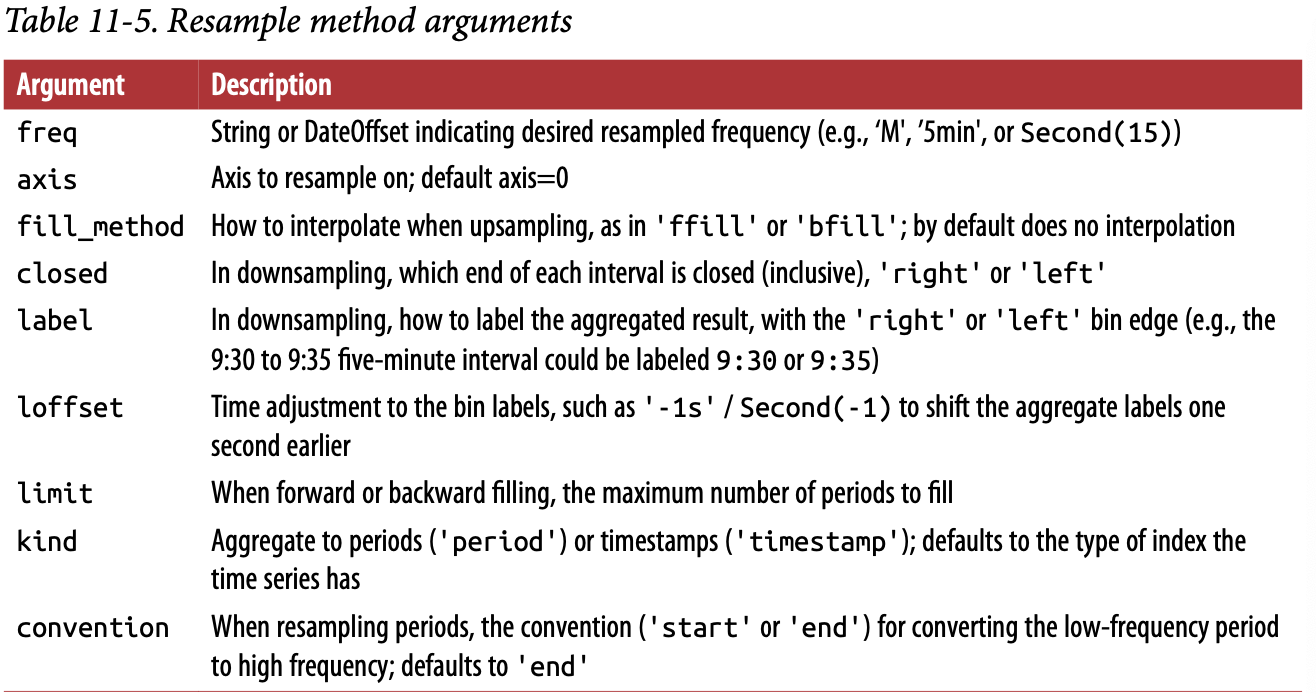

### Downsampling

There are a couple things to think about when using resample to downsample data:

* Which side of each interval is closed
* How to label each aggregated bin, either with the start of the interval or the end

In [ ]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')

In [ ]:
ts = pd.Series(np.arange(12), index = rng)

In [ ]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [ ]:
# aggregate this data into 5-minute chunks or bars by taking
# the sum of each group
ts.resample('5min', closed = 'right').sum()  
# by default, the left bin edge is inclusive
# passing closed = 'right' changes the interval to be closed to the right

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
# passing label = 'right' can label them with the right bin edge
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

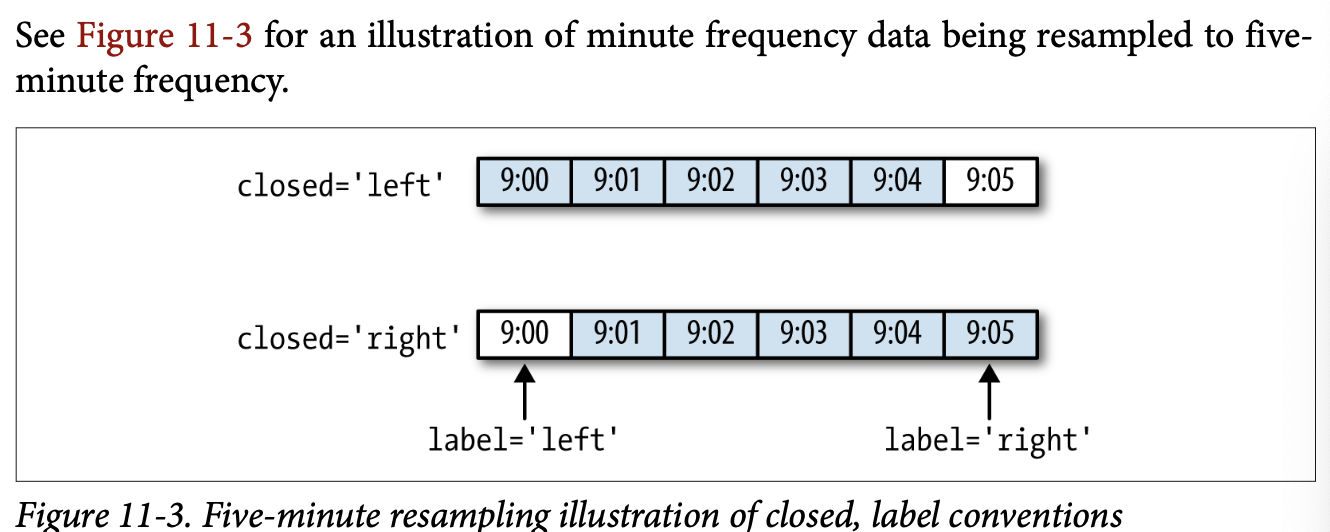

In [ ]:
# shift the result index by some amount
# eg: subtracting 1 second from the right edge
# to make it more clear--> pass a string or date offset to loffset
ts.resample('5min', closed = 'right',
            label = 'right', loffset = '-1s').sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

**Open-High-Low-Close(OHLC) resampling**

Use **ohlc** aggregate function to obtain a DataFrame having columns containing open, high, low, close aggregates, which are efficiently computed in a single sweep of the data.

In [ ]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed

In [ ]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index = pd.date_range('1/1/2000', periods = 2,
                                           freq = 'W-WED'),
                     columns = ['Colorado', 'Texas', 'New Yorks', 'Ohio'])

In [ ]:
frame

,Colorado,Texas,New Yorks,Ohio
2000-01-05,-0.829598,1.022669,0.425093,0.224968
2000-01-12,0.819044,-0.181387,1.465180,-0.300648


Use **asfreq** method to convert to the higher frequency without any aggregation

In [ ]:
df_daily = frame.resample('D').asfreq()

In [ ]:
df_daily

,Colorado,Texas,New Yorks,Ohio
2000-01-05,-0.829598,1.022669,0.425093,0.224968
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.819044,-0.181387,1.465180,-0.300648


Use **fillna and reindex** method to fill the na values

In [ ]:
frame.resample('D').ffill()

,Colorado,Texas,New Yorks,Ohio
2000-01-05,-0.829598,1.022669,0.425093,0.224968
2000-01-06,-0.829598,1.022669,0.425093,0.224968
2000-01-07,-0.829598,1.022669,0.425093,0.224968
2000-01-08,-0.829598,1.022669,0.425093,0.224968
2000-01-09,-0.829598,1.022669,0.425093,0.224968
2000-01-10,-0.829598,1.022669,0.425093,0.224968
2000-01-11,-0.829598,1.022669,0.425093,0.224968
2000-01-12,0.819044,-0.181387,1.465180,-0.300648


In [ ]:
# only fill a certain number of periods forward to 
# limit how far to continue using an observed value
frame.resample('D').ffill(limit = 2)

,Colorado,Texas,New Yorks,Ohio
2000-01-05,-0.829598,1.022669,0.425093,0.224968
2000-01-06,-0.829598,1.022669,0.425093,0.224968
2000-01-07,-0.829598,1.022669,0.425093,0.224968
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.819044,-0.181387,1.465180,-0.300648


In [ ]:
# the new date index need not overlap with the old one at all
frame.resample('W-THU').ffill()

,Colorado,Texas,New Yorks,Ohio
2000-01-06,-0.829598,1.022669,0.425093,0.224968
2000-01-13,0.819044,-0.181387,1.465180,-0.300648


### Resampling with Periods

Resampling data indexed by periods is similar to timestamps

In [ ]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [ ]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.655154,1.004546,-0.882603,-1.103703
2000-02,0.517459,0.287047,1.958407,-2.102178
2000-03,-0.427461,0.855203,0.021666,-0.266802
2000-04,-0.052518,-2.227817,0.043510,-0.632140
2000-05,0.559519,-0.459189,-0.679965,-1.177212


In [ ]:
annual_frame = frame.resample('A-DEC').mean()

In [ ]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.277886,-0.162277,-0.093399,-0.067789
2001,0.206831,0.078954,0.510293,-0.474306



Upsampling is more nuanced, as you must make a decision about **which end of the timespan in the new frequency to place the values before resampling**, just like the asfreq method. The **convention argument defaults to 'start' but can also be 'end'**:

In [ ]:
# Q-DEC: Quarterly, year ending in Dec
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.277886,-0.162277,-0.093399,-0.067789
2000Q2,-0.277886,-0.162277,-0.093399,-0.067789
2000Q3,-0.277886,-0.162277,-0.093399,-0.067789
2000Q4,-0.277886,-0.162277,-0.093399,-0.067789
2001Q1,0.206831,0.078954,0.510293,-0.474306
2001Q2,0.206831,0.078954,0.510293,-0.474306
2001Q3,0.206831,0.078954,0.510293,-0.474306
2001Q4,0.206831,0.078954,0.510293,-0.474306


In [ ]:
annual_frame.resample('Q-DEC', convention = 'end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.277886,-0.162277,-0.093399,-0.067789
2001Q1,-0.277886,-0.162277,-0.093399,-0.067789
2001Q2,-0.277886,-0.162277,-0.093399,-0.067789
2001Q3,-0.277886,-0.162277,-0.093399,-0.067789
2001Q4,0.206831,0.078954,0.510293,-0.474306


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:
* In downsampling, the target frequency must be a subperiod of the source frequency.
* In upsampling, the target frequency must be a superperiod of the source frequency.

In [ ]:
# eg: the timespans defined by Q- MAR only 
# line up with A-MAR, A-JUN, A-SEP, and A-DEC
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.277886,-0.162277,-0.093399,-0.067789
2001Q1,-0.277886,-0.162277,-0.093399,-0.067789
2001Q2,-0.277886,-0.162277,-0.093399,-0.067789
2001Q3,-0.277886,-0.162277,-0.093399,-0.067789
2001Q4,0.206831,0.078954,0.510293,-0.474306
2002Q1,0.206831,0.078954,0.510293,-0.474306
2002Q2,0.206831,0.078954,0.510293,-0.474306
2002Q3,0.206831,0.078954,0.510293,-0.474306


## 11.7 Moving Window Functions

An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. I call these **moving window functions**, even though it includes functions without a **fixed-length window like exponentially weighted moving average**. Like other statistical functions, these also automatically exclude missing data.

In [ ]:
close_px_all = pd.read_csv('stock_px.csv',
                           parse_dates = True, index_col = 0)

In [ ]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [ ]:
close_px = close_px.resample('B').ffill() # 'B' business day

**rolling** operator, which behaves similarly to resample and groupby. It can be called on a Series or DataFrame along with a window (expressed as a number of periods

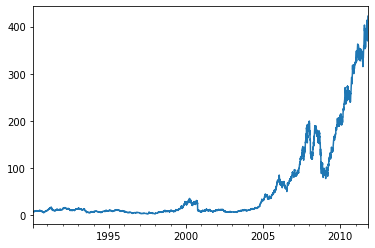

In [ ]:
close_px.AAPL.plot()

The expression rolling(250) is similar in behavior to groupby, but instead of group‐ ing it creates an object that enables grouping over a 250-day sliding window.

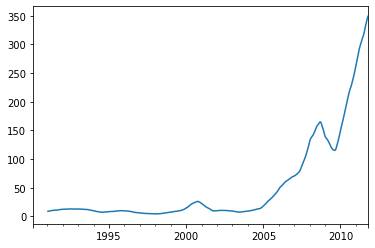

In [ ]:
close_px.AAPL.rolling(250).mean().plot() # apple price with 250-day MA

By default **rolling functions require all of the values in the window to be non-NA**. This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series.

In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods = 10).std()

In [ ]:
appl_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

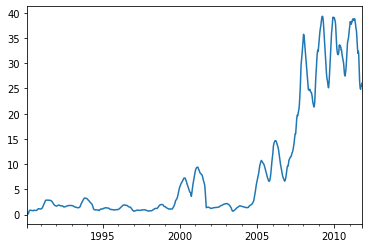

In [ ]:
appl_std250.plot()

In order to compute an **expanding window mean**, use the **expanding** operator instead of rolling. The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series.

In [ ]:
expanding_mean = appl_std250.expanding().mean()

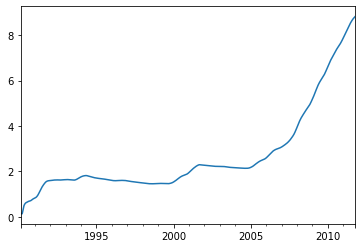

In [ ]:
expanding_mean.plot()

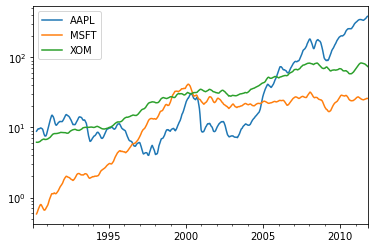

In [ ]:
# call a moving window function on a DataFrame applies 
# the transformation to each column
close_px.rolling(60).mean().plot(logy = True) # log Y-axis

The rolling function also **accepts a string indicating a fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series.** These are the same strings that you can pass to resample. For example, we could compute a 20-day rolling mean like so:

In [ ]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

An alternative to using a static window size with equally weighted observations is to **specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor**. A popular one is **using a span**, which makes the result comparable to a simple moving window function with win‐ dow size equal to the span.

Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.

pandas has the **ewm** operator to go along with rolling and expanding. Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW mov‐ ing average with span=60

In [ ]:
aapl_px = close_px.AAPL['2006':'2007']

In [ ]:
ma60 = aapl_px.rolling(30, min_periods = 20).mean()

In [ ]:
ewma60 = aapl_px.ewm(span = 30).mean()

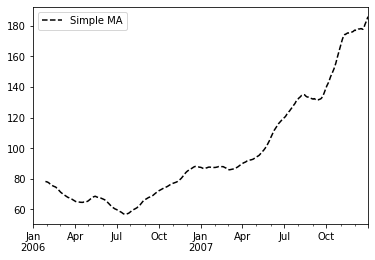

In [ ]:
ma60.plot(style = 'k--', label = 'Simple MA')
plt.legend()

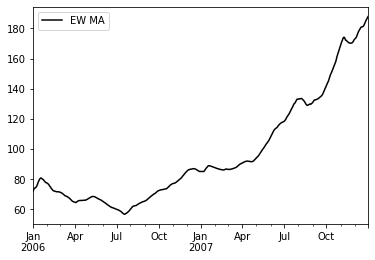

In [ ]:
ewma60.plot(style = 'k-', label = 'EW MA')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

### Binary Moving Window Functions

Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correla‐ tion to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

In [ ]:
spx_px = close_px_all['SPX']

In [ ]:
spx_rets = spx_px.pct_change()

In [ ]:
returns = close_px.pct_change()

**corr** aggregation function can compute the rolling correlation with spx_rets after we call rolling

In [ ]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)

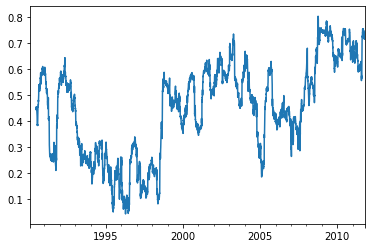

In [ ]:
corr.plot()

Compute the correlation of the S&P 500 index with many stocks at once. Use **rolling_corr** will compute the correlation of the Series with each column in the DataFrame

In [ ]:
corr = returns.rolling(125, min_periods= 100).corr(spx_rets)

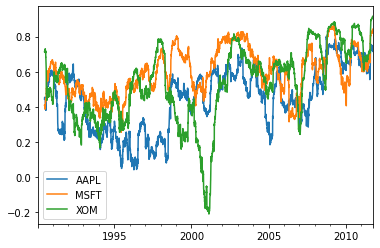

In [ ]:
corr.plot()
plt.legend()

### User-defined Moving Window Functions

The **apply method on rolling and related methods provides a means to apply an array function of your own devising over a moving window**. The only requirement is that the function produce a single value (a reduction) from each piece of the array. For example, while we can compute sample quantiles using rolling(...).quantile(q), we might be interested in the percentile rank of a particular value over the sample. The **scipy.stats.percentileofscore** function does just this

In [ ]:
from scipy.stats import percentileofscore

In [ ]:
score_at_2percent = lambda x : percentileofscore(x, 0.02)

In [ ]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

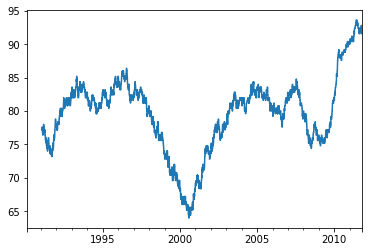

In [ ]:
result.plot()